#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>

##### <font color="#03997A"> Dr: Alejandro Pimentel </font>

##### <font color="#03997A"> Modulo 6 Aprendizaje de Maquina supervisado </font>

##### <font color="#03997A"> Tema 5: Bosque de Regresión Alumno: Ibarra Ramírez Sergio </font>

Recordar que existen dos maneras de fomentar la toma de 'arboles independientes' para la formación del árbol: <br>
 A) Bagging: Muestreo aleatorio simple con repetición permitida para formar A árboles <br>
 B) Random subspaces: Tomar aleatoriamente y con repetición permitida n columnas / características/ variables explicativas para consturir el Ai-eismo arbol

Vamos a separar las variables independientes de la dependiente y los sets de train y test

In [3]:
import pandas as pd

tabla = pd.read_csv("https://gitlab.com/dgtic5/res/-/raw/main/aprendizajeSupervizado/Alumni_Giving_Regression.csv")

from sklearn.model_selection import train_test_split

# AQUI SEPARO DEPENDIENTE DE INDEPENDIENTES
y = tabla["E"] 
X = tabla.drop(["E"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2023)

Vamos a importar la libreria de RandomForestRegressor

In [1]:
from sklearn.ensemble import RandomForestRegressor

**Parámetros del Arbol de Regresión**

n_estimators : Cantidad de arboles a formar 

max_samples : Es el encargado de la técnica de bagging y espera un % que indica´ria del 100% de la data de traincuanto va a tomar en cada uno de los arboles para formar la muestra aleatoria simple 

max_features: Se encarga de la parte de Random subespaces y tambíen espera un número entre 0 y 1   -Tiene la opción de sqrt o log2

max_depth : Para cada arbol el numero de niveles 

Definimos y entrenamos el modelo de bosque

In [18]:
bosque = RandomForestRegressor(n_estimators=100,max_depth=3,max_samples=0.8,max_features=0.8,random_state=2023)

bosque.fit(X_train,y_train)

RandomForestRegressor(max_depth=3, max_features=0.8, max_samples=0.8,
                      random_state=2023)

Se hace la predicicón con el modelo RandomForestRegressor y se evalua el error 

In [5]:
from sklearn.metrics import mean_squared_error

y_pred = bosque.predict(X_test)
RMSE = mean_squared_error(y_test,y_pred,squared=False)
print(RMSE)

0.033279143292424734


Vamos a visualizar como se comporta el resultado de un Random Forest con respecto a una sola variable (para el caso del train)

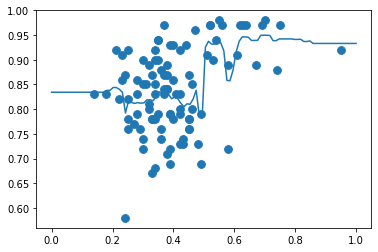

In [8]:
import matplotlib.pyplot as plt
import numpy as np

bosqueV = RandomForestRegressor(n_estimators=100,max_depth=3,max_samples=0.8,max_features=0.8)

bosqueV.fit(X_train["B"].to_numpy().reshape(-1,1),y_train)

x_func = np.linspace(0,1,100)
y_func = bosqueV.predict(x_func.reshape(-1,1))

x_points = X_train["B"]
y_points = y_train

fig, ax = plt.subplots()
ax.plot(x_func,y_func)
ax.scatter(x_points,y_points,s=60)

Vamos a visualizar como se comporta el resultado de un Random Forest con respecto a una sola variable (para el caso del test)

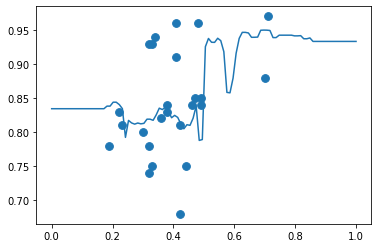

In [9]:
x_points = X_test["B"]
y_points = y_test

fig, ax = plt.subplots()
ax.plot(x_func,y_func)
ax.scatter(x_points,y_points,s=60)

Para tener acceso a cada arbol del bosque

In [11]:
bosque.estimators_

[DecisionTreeRegressor(max_depth=3, max_features=0.8, random_state=1277021773),
 DecisionTreeRegressor(max_depth=3, max_features=0.8, random_state=685872661),
 DecisionTreeRegressor(max_depth=3, max_features=0.8, random_state=1725459232),
 DecisionTreeRegressor(max_depth=3, max_features=0.8, random_state=1085587075),
 DecisionTreeRegressor(max_depth=3, max_features=0.8, random_state=388682470),
 DecisionTreeRegressor(max_depth=3, max_features=0.8, random_state=1027418254),
 DecisionTreeRegressor(max_depth=3, max_features=0.8, random_state=225361454),
 DecisionTreeRegressor(max_depth=3, max_features=0.8, random_state=2113362117),
 DecisionTreeRegressor(max_depth=3, max_features=0.8, random_state=2073952904),
 DecisionTreeRegressor(max_depth=3, max_features=0.8, random_state=1104496774),
 DecisionTreeRegressor(max_depth=3, max_features=0.8, random_state=1600422611),
 DecisionTreeRegressor(max_depth=3, max_features=0.8, random_state=581516072),
 DecisionTreeRegressor(max_depth=3, max_feat

Para graficar solo uno de los árboles del bosque 

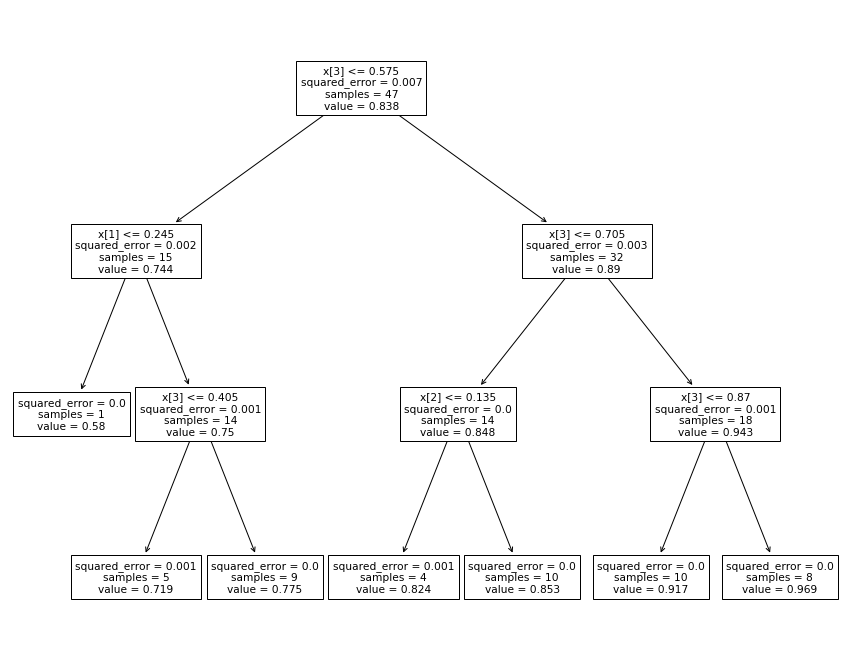

In [13]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(15,12))
tree.plot_tree(bosque.estimators_[0])
plt.show()

Para visualizar la importancia de cada uno de los features o variables predicoras Xj en un arbol, se tiene: 

In [20]:
bosque.estimators_[0].feature_importances_

array([0.        , 0.43250733, 0.00142446, 0.56606821, 0.        ])

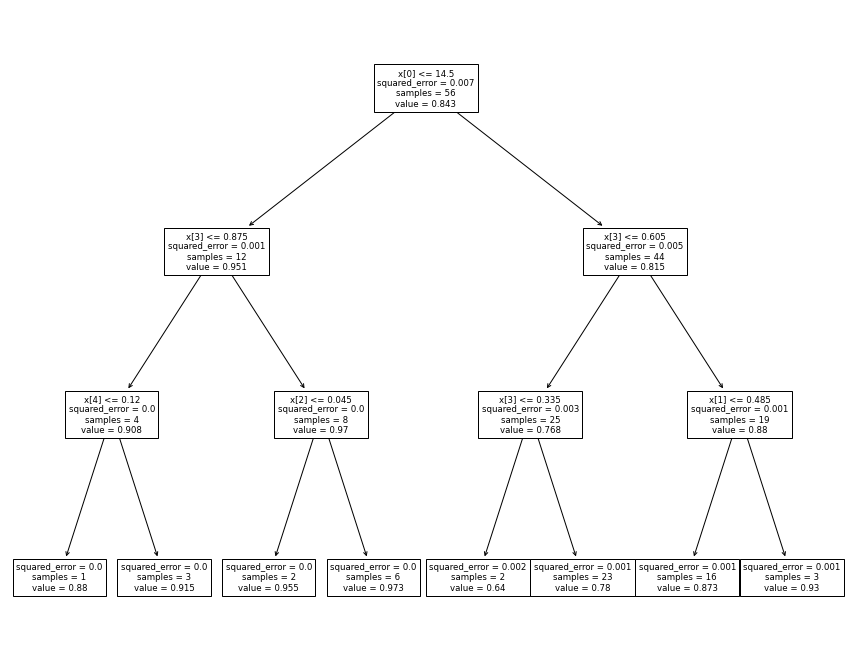

In [17]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(15,12))
tree.plot_tree(bosque.estimators_[90])
plt.show()

In [21]:
bosque.estimators_[90].feature_importances_

array([0.        , 0.00368033, 0.        , 0.95640991, 0.03990976])